# Face Detection
- haarcascade
- HOG(Histograms Of Oriented Gradients)
- Detecting faces with CNN


### openCV
1. Loading the image


In [5]:
import cv2
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Project/Computer Vision/src/Images/people1.jpg')

In [6]:
image.shape

(1280, 1920, 3)

In [7]:
# opencv 기능
# cv2.imshow(image)

# colab 이미지 show
cv2_imshow(image)

Output hidden; open in https://colab.research.google.com to view.

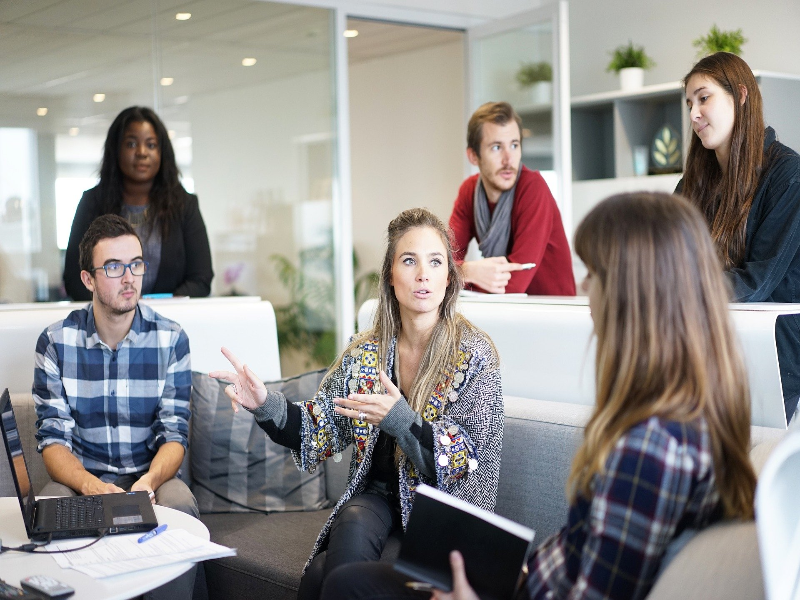

In [ ]:
# 이미지 크기 변경
image = cv2.resize(image,(800, 600))
cv2_imshow(image)

## haarcascade란? <br>
얼굴의 특징을 설명하는 Haar-like 특징을 사용하여 객체를 감지한다. 각 Hear-like 특징은 흑과 백의 직사각형 영역으로 구성되며, 이특징의 조합으로 객체를 식별한다. <br>
학습 단계에선 얼굴을 포함하는 긍정 이미지와 얼굴이 없는 부정 이미지를 사용하여 분류기를 학습한다. 이때 AdaBoost알고리즘으로 약한 분류기와 강력한 분류기로 결합한다. 그리고 학습된 모델은 Cascade(계단식)으로 구성되어 다양한 스케일에서 효과적으로 객체를 검출 할 수 있도록 설계된다. 빠른 속도로 객체를 감지 할 수 있다는 장점이 있다
<br>
\* 흑백사진을 선호,실시간 얼굴 감지 가능, 안면 인식등

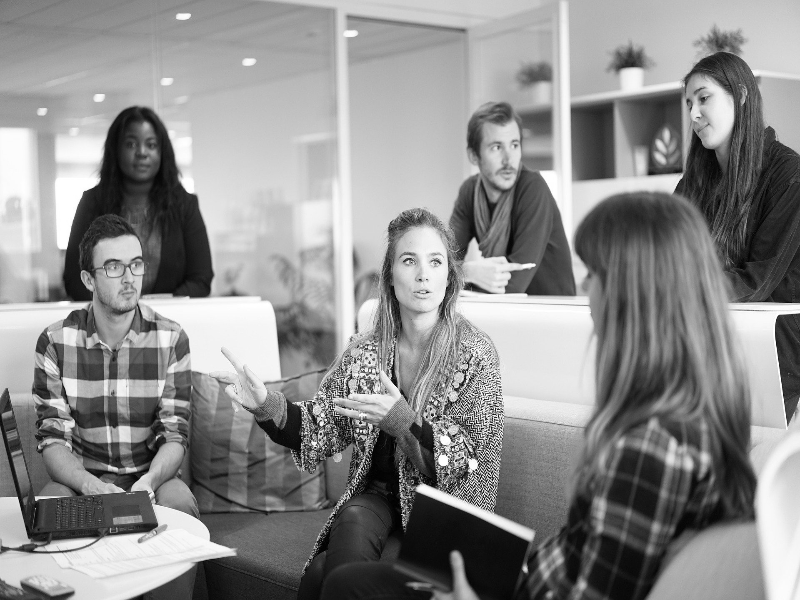

(600, 800)


In [ ]:
# RGB 채널 컬러 이미지 -> 흑백 채널 이미지
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image_gray)
print(image_gray.shape)

In [ ]:
# Detecting faces

# Cascade 함수호출(기존 학습된 모델 사용)
face_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/Project/Computer Vision/src/Cascades/haarcascade_frontalface_default.xml')

In [ ]:
# 감지
detections = face_detector.detectMultiScale(image_gray)
# 감지된 부분을 2차원 배열로 출력
# [x좌표, y좌표, weight, height]
print(detections)

[[677  72  68  68]
 [115 124  53  53]
 [475 123  59  59]
 [387 233  73  73]
 [ 92 239  66  66]
 [390 323  56  56]]


677 72 68 68
115 124 53 53
475 123 59 59
387 233 73 73
92 239 66 66
390 323 56 56


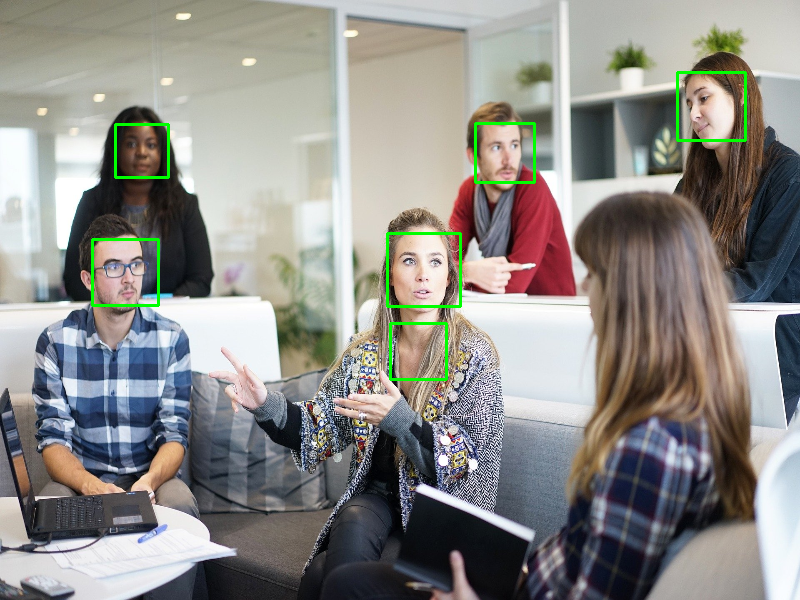

In [ ]:
for (x,y,w,h) in detections:
  print(x,y,w,h)
  # rectangle(image_src, 사각형 시작위치, 사각형 종료위치, 색깔, border 굵기)
  cv2.rectangle(image, (x,y),(x+w,y+h), (0,255,0),2)
cv2_imshow(image)

### haarcascade parameters 조정
- **scaleFactor**<br>
  - 이미지를 얼마나 축소하여 검사할지를 결정하는 매개변수이다. 이 값은 1보다 큰 수로, 이미지를 반복해서 검사할 때의 스케일 간격을 지정한다. 작은 값은 더 많은 스케일을 사용하여 객체를 검출하게 하지만, 계산 비용이 증가하게 됩니다.<br>
  - 기본값 :1.1
  - 예시 : <br>
   - `scaleFactor=1.1`은 이미지를 1.1배씩 축소하여 검사 검사합니다.
- **minNeighbors**
  - 이미지에서 최종경계상자를 정할때 알고리즘 내부에선 여러개의 후보 경계상자를 감지하고 그중 최고의 경계상자를 최종 경계상자로 설정한다 이때 후보 경계상자의 개수가 minNeighbors값보다 적은 감지된 부분은 감지에서 제외시킨다.
  - 기본값:3
- **minSize**
  - 최종경계상자의 크기가 minSize를 넘기지 못하면 감지 대상에서 제외한다
  - 기본값:(30,30)
- **maxSize**
  - 최종경계상자의 크기가 maxSize를 넘긴다면 감지 대상에서 제외한다
  - 기본값: 제한 없음(None)


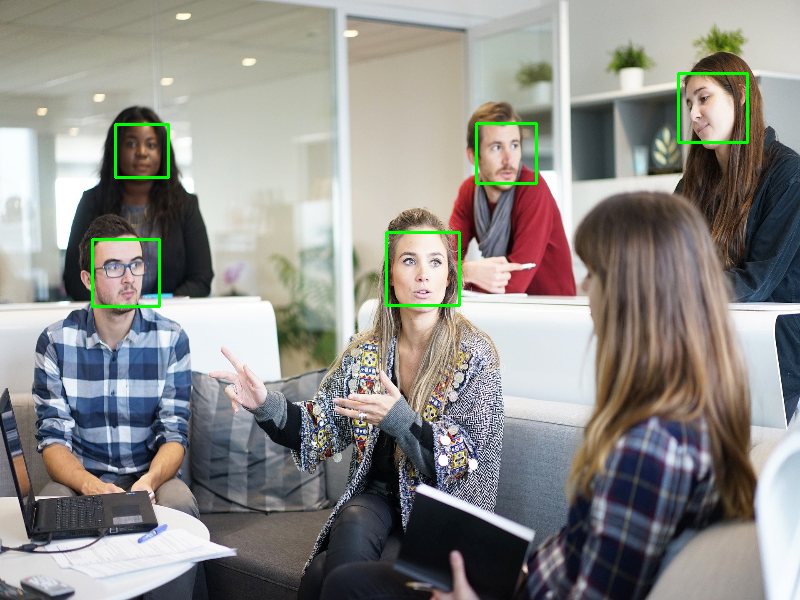

In [ ]:
# scaleFactor
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Project/Computer Vision/src/Images/people1.jpg')
image = cv2.resize(image,(800, 600))
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# 얼굴 감지
detections = face_detector.detectMultiScale(image_gray, scaleFactor=1.15)
for (x,y,w,h) in detections:
  #print(x,y,w,h)
  # rectangle(image_src, 사각형 시작위치, 사각형 종료위치, 색깔, border 굵기)
  cv2.rectangle(image, (x,y),(x+w,y+h), (0,255,0),2)
cv2_imshow(image)

(537, 1023, 3)


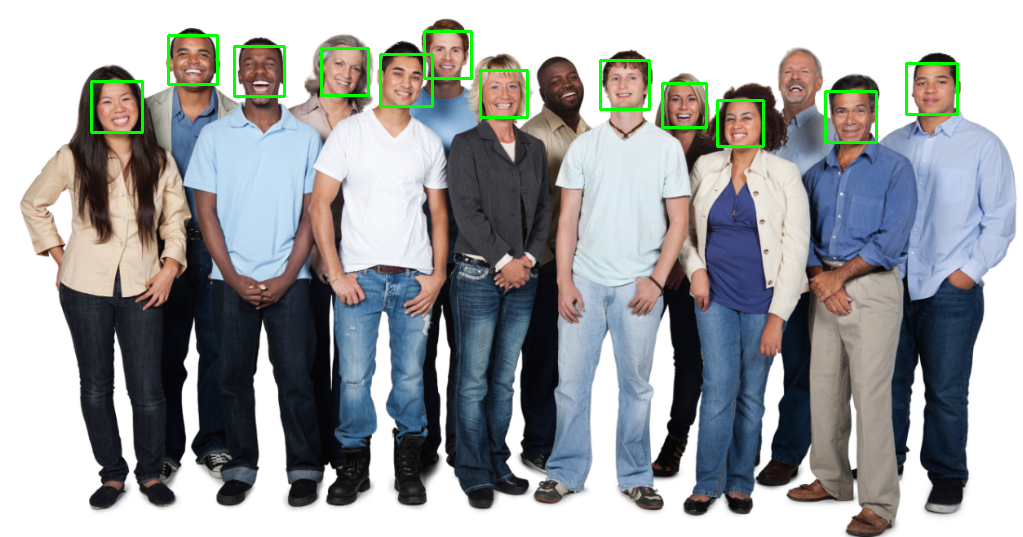

In [ ]:
#minNeighbors,minSize,maxSize
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Project/Computer Vision/src/Images/people2.jpg')
#이미지가 작기때문에 reshape 하지 않는다.
print(image.shape)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# 얼굴 감지
detections = face_detector.detectMultiScale(image_gray, scaleFactor=1.2, minNeighbors=7, minSize=(20,20), maxSize=(100,100))
for (x,y,w,h) in detections:
  #print(x,y,w,h)
  # rectangle(image_src, 사각형 시작위치, 사각형 종료위치, 색깔, border 굵기)
  cv2.rectangle(image, (x,y),(x+w,y+h), (0,255,0),2)
cv2_imshow(image)

### **아무리 매개변수를 설정해도 모든 감지가 정확하게 이루어지지 않을 경우도 있다.**

### Haar Casecade - Eye detection


In [ ]:
# 눈 검출 분류기
eye_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/Project/Computer Vision/src/Cascades/haarcascade_eye.xml')

In [ ]:
# scaleFactor
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Project/Computer Vision/src/Images/people1.jpg')
# 감지가 잘 안된다면 이미지의 크기를 조정하여 다시 감지하자
#image = cv2.resize(image,(800, 600))
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# 얼굴 감지
detections = face_detector.detectMultiScale(image_gray, scaleFactor=1.15, minSize=(60,60))
eye_detections = eye_detector.detectMultiScale(image_gray, scaleFactor=1.1,minNeighbors=9, maxSize=(70,70))
for (x,y,w,h) in detections:
  #print(x,y,w,h)
  # rectangle(image_src, 사각형 시작위치, 사각형 종료위치, 색깔, border 굵기)
  cv2.rectangle(image, (x,y),(x+w,y+h), (0,255,0),2)
for (x,y,w,h) in eye_detections:
  print(x,y,w,h)
  # rectangle(image_src, 사각형 시작위치, 사각형 종료위치, 색깔, border 굵기)
  cv2.rectangle(image, (x,y),(x+w,y+h), (255,0,0),2)
cv2_imshow(image)

Output hidden; open in https://colab.research.google.com to view.

다른 객체 감지하기

· Haarscascades 폴더에 다른 .xml 파일이 몇 개 있습니다. 자동차, 시계 및 인간의 전체 신체를 감지하는 데 사용할 수 있습니다.

· Images 폴더에는 다른 테스트 이미지도 있습니다.

·이 활동의 목표는 하르 캐스케이드와 이미지들을 사용하여 새 분류기를 테스트하는 것입니다. 방금 배운 매개 변수들을 사용하여 가능한 최상의 결과를 얻기 위해 노력하세요.


## HOG - HISTOGRAMS OF ORIENTED GRADIENTS 란? <br>
HOG의 기본 아이디어는 이미지의 지역적 그래디언트 방향에 대한 히스토그램을 계산하여 이미지의 형태와 특징을 표현하는 것이다. 이를 통해 물체의 모양과 특징을 감지할 수 있다.
<br>
\* Dlib 라이브러리를 사용


In [9]:
import dlib

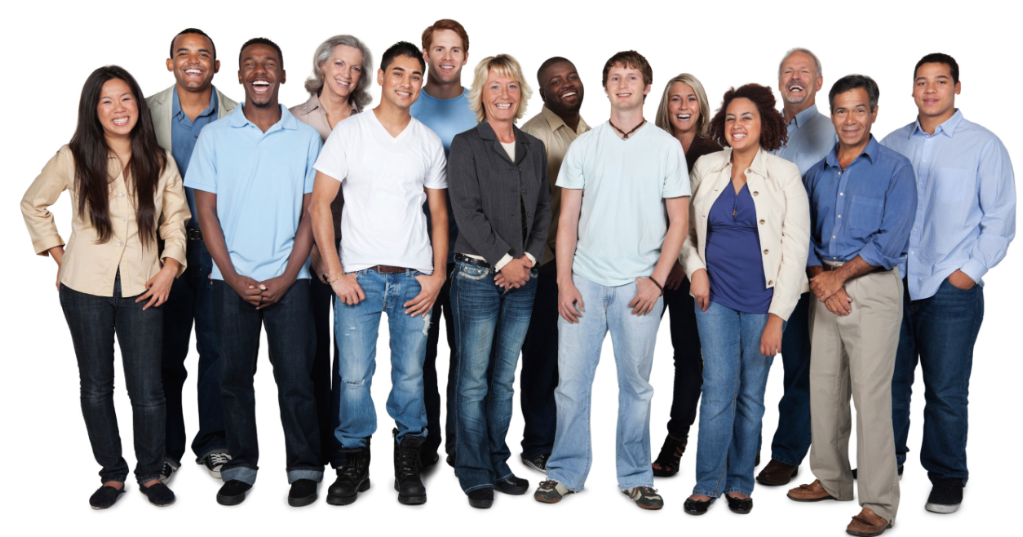

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Project/Computer Vision/src/Images/people2.jpg')
cv2_imshow(image)

In [ ]:
# dlib를 통해 HOG를 사용할때 이미 내장된 학습 모델을 제공하기 때문에 따로 모델의 경로를 적어줄 필요가없다.
face_detector_hog = dlib.get_frontal_face_detector()
# HOG haar보다 복잡한 계산을 함으로 흑백사진보다 컬러사진이 더 양질의 결과를 얻는다
detections = face_detector_hog(image)
# 매개변수없이 face_detector_hog(image)를 실행하면 감지된 얼굴이 없다. 그이유는 매개변수로 설정을 하여 감지를 정확하게 하지 않았기 때문이다
detections

rectangles[]

rectangles[[(429, 38) (465, 74)], [(665, 90) (701, 126)], [(717, 103) (760, 146)], [(909, 70) (952, 113)], [(828, 98) (871, 142)], [(605, 70) (641, 106)], [(777, 62) (813, 98)], [(485, 78) (521, 114)], [(386, 60) (429, 103)], [(170, 41) (213, 84)], [(93, 89) (136, 132)], [(237, 50) (280, 94)], [(323, 50) (367, 94)], [(544, 65) (588, 108)]]


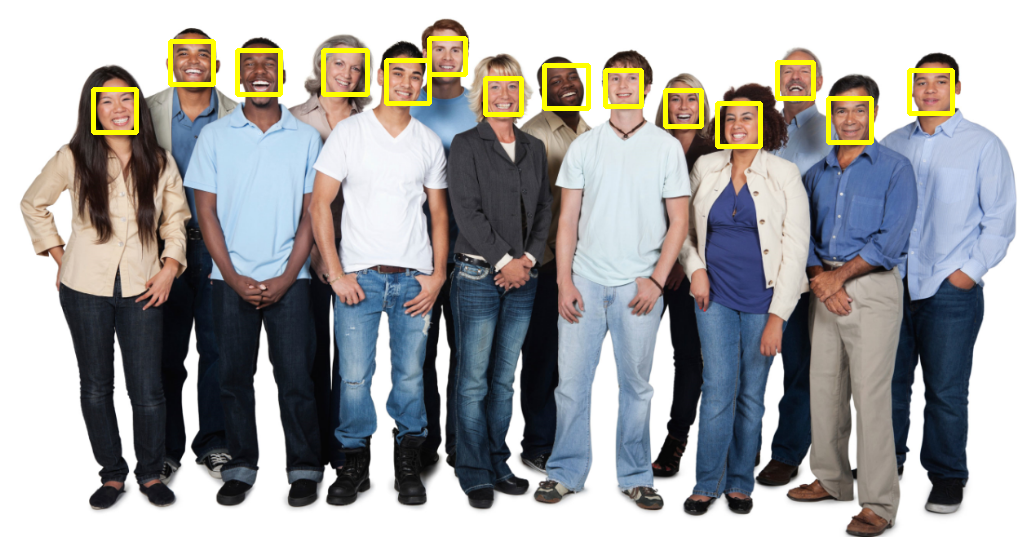

In [ ]:
# face_detector_hog의 두번째 매개변수는 haar의 scaleFactor처럼 이미지 크기를 결정하는 변수이다.
# 이 값은 높을수록 더 작은 얼굴까지 감지한다. 따라서 높을수록 시간이 오래걸린다.
detections = face_detector_hog(image,1)
print(detections)
for face in detections:
  l, t,r,b = face.left(), face.top(), face.right(), face.bottom()
  cv2. rectangle(image, (l,t),(r,b),(0,255,255),3)
cv2_imshow(image)

## Detecting faces with CNN 란? <br>
CNN의 기술을 기반으로 얼굴을 감지하는 방법이다.
가장 현대적인 방법으로 높은 정확도와 효율성을 제공한다.
<br>
\* Dlib 라이브러리를 사용


In [13]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Project/Computer Vision/src/Images/people2.jpg')
cnn_detector = dlib.cnn_face_detection_model_v1('/content/drive/MyDrive/Colab Notebooks/Project/Computer Vision/src/Weights/mmod_human_face_detector.dat')

1.1440610885620117
1.137049913406372
1.1278995275497437
1.1200282573699951
1.1149375438690186
1.1131553649902344
1.0975688695907593
1.0942121744155884
1.085315227508545
1.0801889896392822
1.0800762176513672
1.0784764289855957
1.066403865814209
1.0641791820526123


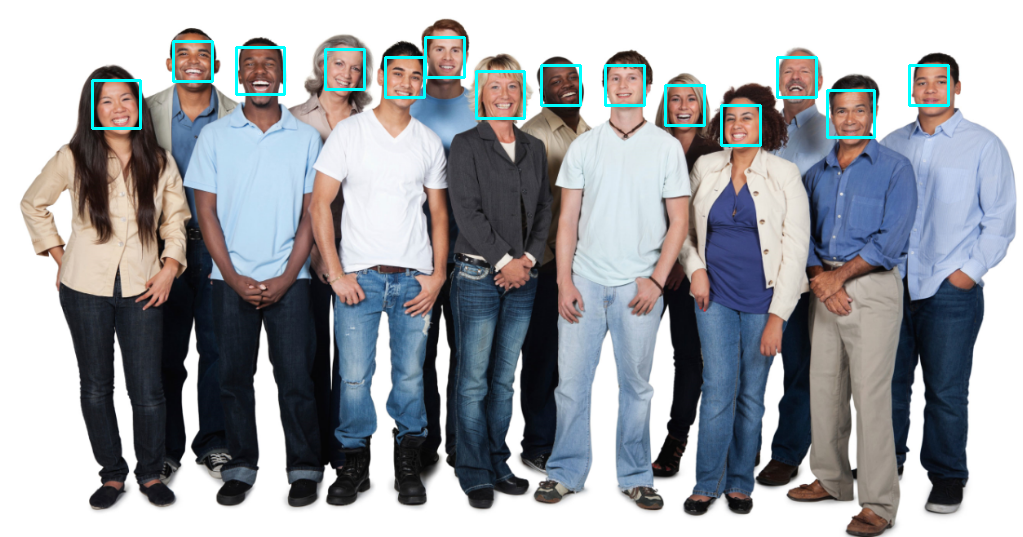

In [14]:
# HOG 와같이 두번째 매개변수는 scaleFactor이다
detections = cnn_detector(image,1)
for face in detections:
  # HOG와 다르게 confidence()로 신뢰도를 알수있다.
  l, t, r, b, c = face.rect.left(), face.rect.top(), face.rect.right(), face.rect.bottom(), face.confidence
  # 신뢰도값은 보통 0~1까지 값을 나타내지만 dlib의 CNN 탐지기법은 1 이상의 값도 가질수있다( 1이상은 거의 확실 )
  print(c)
  cv2.rectangle(image, (l,t), (r,b), (255,255,0),2)
cv2_imshow(image)

하르 캐스케이드 x HOG x CNN 비교

배웠던 하르 캐스케이드, HOG 및 CNN 등 각각의 알고리즘의 이용하여 people3.jpg 이미지의 사람 얼굴을 감지해봐라.

\* 각각의 알고리즘을 비교하여 어떤 방식이 가장 효과적인지 비교하라.
